# Python librarys

In [414]:
# Core libraries
import pandas as pd
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: model selection & metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    recall_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Statistical tests
from scipy.stats import f_oneway, chi2_contingency

# Preprocessing & sampling
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.ensemble import RandomForestClassifier

# Data Preparation

Load the Cleaned Dataset

In [ ]:
df_clean = pd.read_csv(r"HealthAI\data\cleaned_data.csv")
print("Total DataFrame Shape:" , df_clean.shape)
df_clean.head()

Total DataFrame Shape: (14622, 53)


,Unnamed: 0,serial_no,admission_no,age,gender,residence_type,admission_type,admission_month_year,length_of_stay_days,icu_stay_days,...,congenital_heart_disease,urinary_tract_infection,neurocardiogenic_syncope,orthostatic_hypotension,infective_endocarditis,deep_vein_thrombosis,cardiogenic_shock,shock,pulmonary_embolism,chest_infection
0,0,1,234735,81,M,R,E,Apr-17,3,2,...,0,0,0,0,0,0,0,0,0,0
1,1,2,234696,65,M,R,E,Apr-17,5,2,...,0,0,0,0,0,0,0,0,0,0
2,2,3,234882,53,M,U,E,Apr-17,3,3,...,0,0,0,0,0,0,0,0,0,0
3,3,4,234635,67,F,U,E,Apr-17,8,6,...,0,0,0,0,0,0,0,0,0,0
4,4,5,234486,60,F,U,E,Apr-17,23,9,...,0,0,0,0,0,0,0,0,0,0


Target Variable Construction (Risk Level Definition)

In [383]:
disease = [
    'diabetes_mellitus',
    'hypertension',
    'coronary_artery_disease',
    'chronic_kidney_disease'
]

df_clean['risk_level'] = (df_clean[disease].sum(axis=1) > 0).astype(int)

df_clean['risk_level'].value_counts()

risk_level
1    11914
0     2708
Name: count, dtype: int64

Domain-Based Feature Selection

In [384]:
risk_features = [
    # Demographics
    "age", "gender",

    # Lifestyle
    "smoking_status", "alcohol_use",

    # Labs
    "hemoglobin", "total_leukocyte_count",
    "platelet_count", "glucose_level",
    "urea_level", "creatinine_level"
]

In [385]:
df_clean = df_clean[risk_features + ['risk_level']]

Train–Test Split with Stratification

In [386]:
train_data, test_data = train_test_split(
    df_clean,
    test_size=0.20,
    random_state=42,
    stratify=df_clean['risk_level']
)

In [387]:
print("Train DataFtame shape:", train_data.shape)
print("Test DataFtame shape:", test_data.shape)

Train DataFtame shape: (11697, 11)
Test DataFtame shape: (2925, 11)


In [388]:
target = 'risk_level'
features = train_data.drop(columns="risk_level")
train_data[target].value_counts()

risk_level
1    9531
0    2166
Name: count, dtype: int64

Feature Type Identification

In [389]:
categorical_cols = features.columns[features.nunique()<=2]
numerical_cols = features.columns[features.nunique()>2]

print(categorical_cols.tolist())
print(numerical_cols.tolist())

['gender', 'smoking_status', 'alcohol_use']
['age', 'hemoglobin', 'total_leukocyte_count', 'platelet_count', 'glucose_level', 'urea_level', 'creatinine_level']


# EDA

Univariate Analysis - Numeric Features


===== Numeric Feature: age =====
Skewness: -0.5


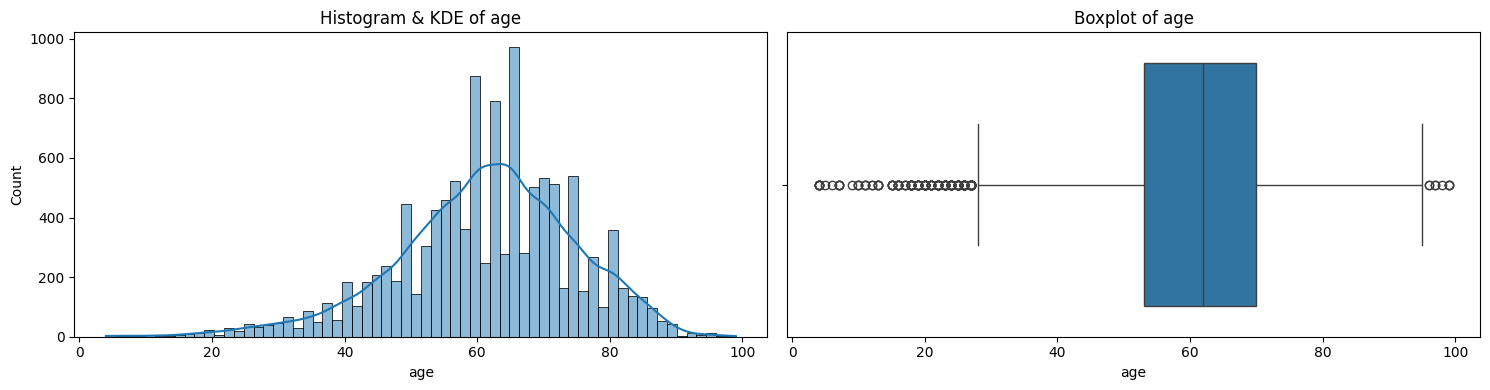


===== Numeric Feature: hemoglobin =====
Skewness: -0.25


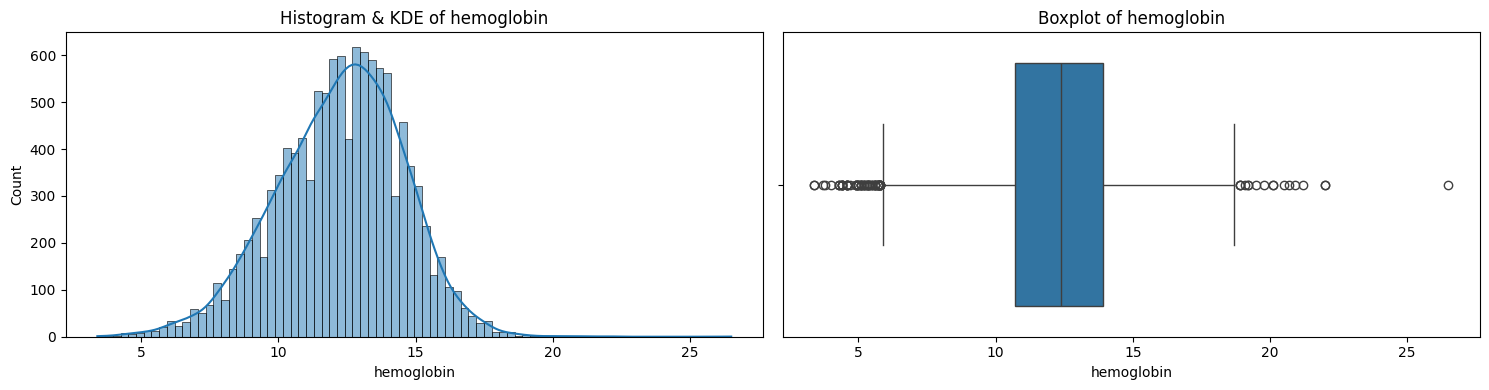


===== Numeric Feature: total_leukocyte_count =====
Skewness: 8.08


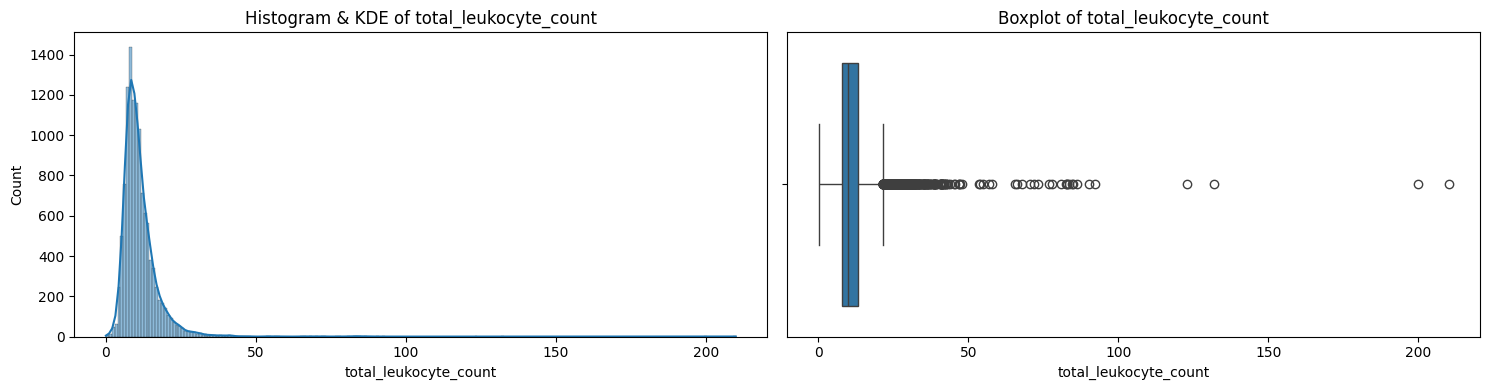


===== Numeric Feature: platelet_count =====
Skewness: 1.34


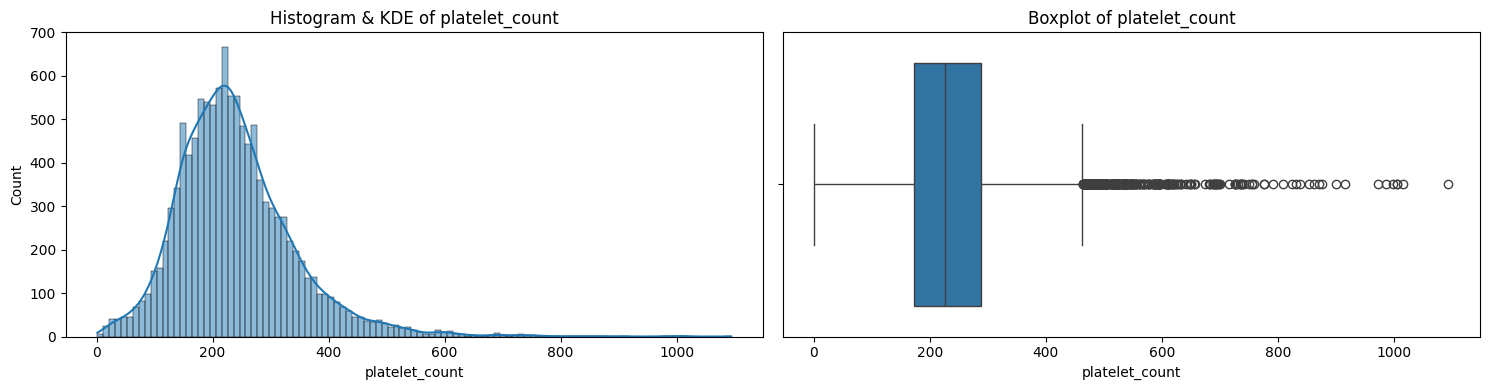


===== Numeric Feature: glucose_level =====
Skewness: 1.98


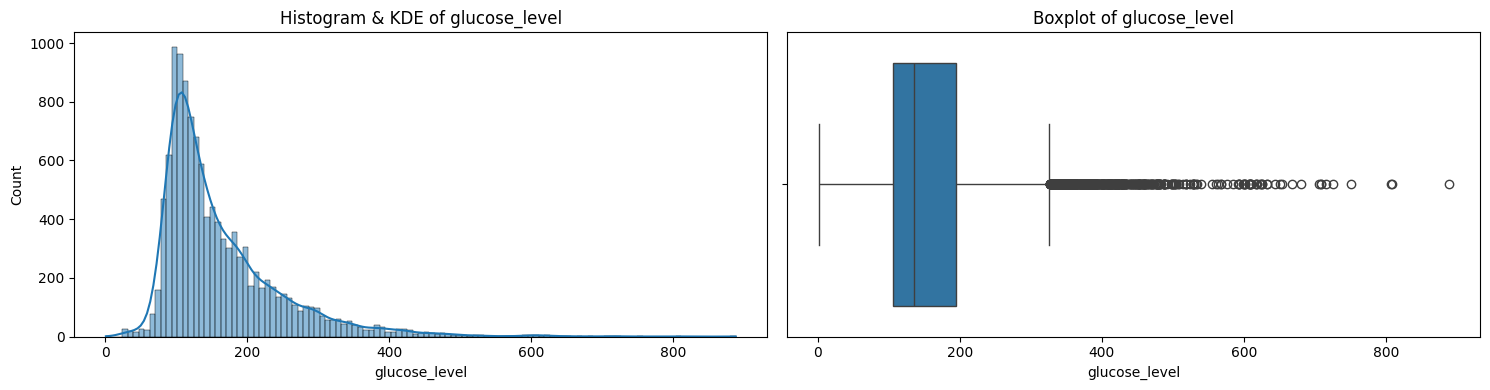


===== Numeric Feature: urea_level =====
Skewness: 3.0


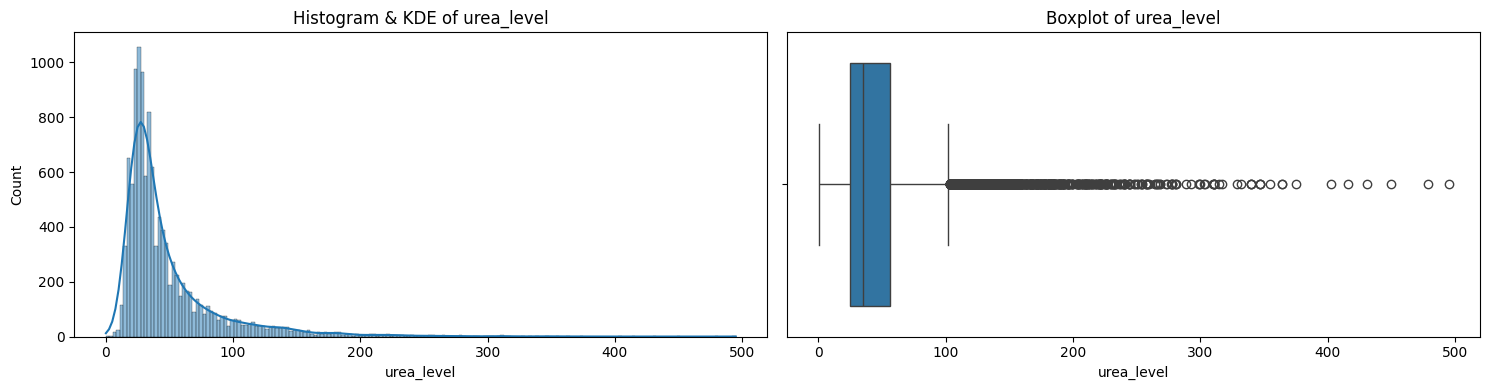


===== Numeric Feature: creatinine_level =====
Skewness: 4.04


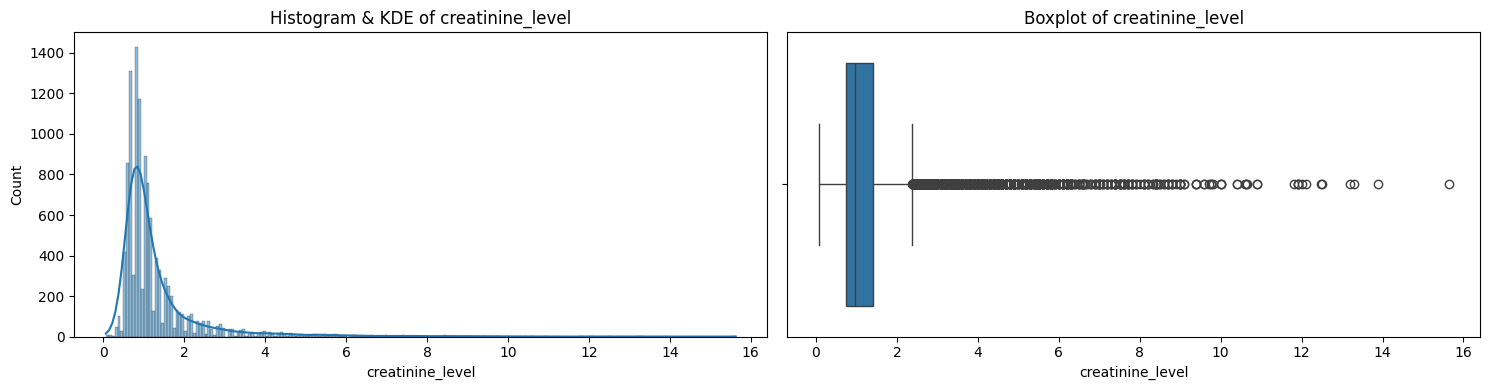

In [390]:
# Univariate Analysis - Numeric Features

for col in numerical_cols:
    print(f"\n===== Numeric Feature: {col} =====")

    # Skewness
    skew_val = train_data[col].skew()
    print("Skewness:", round(skew_val, 2))

    
    # 2 Subplots (Histogram + Boxplot)
    
    fig, axes = plt.subplots(1, 2, figsize=(15,4))

    # Histogram + KDE
    sns.histplot(train_data[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram & KDE of {col}")

    # Boxplot
    sns.boxplot(x=train_data[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


Univariate analysis for categorical_cols:


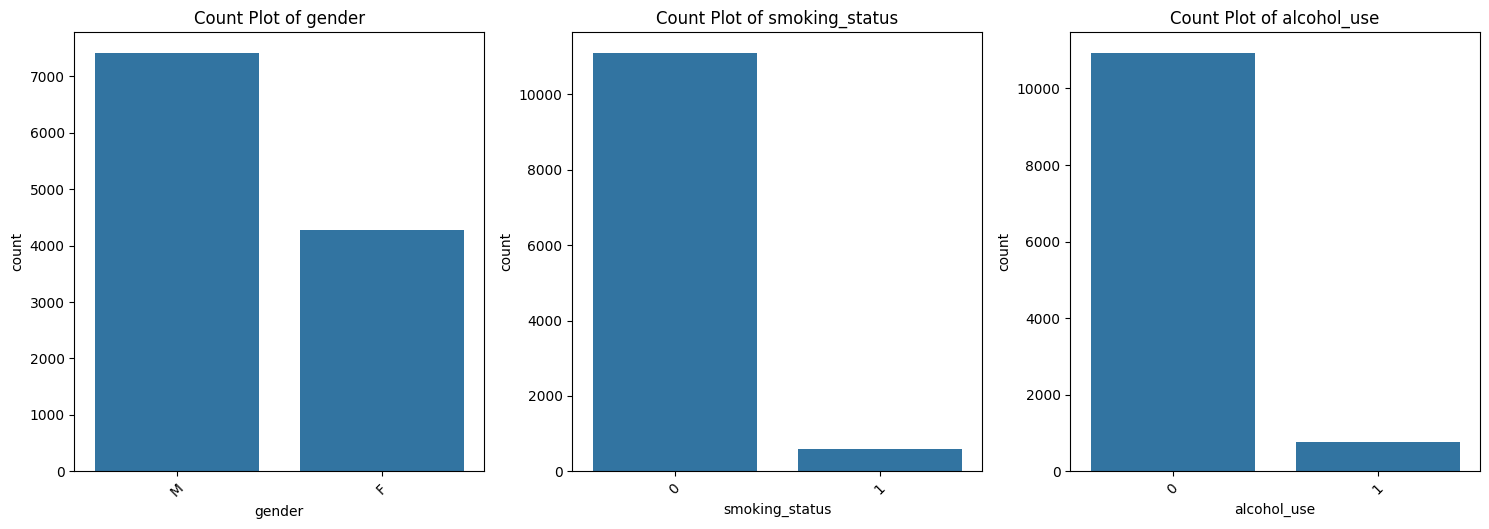

In [391]:
#Univariate analysis for categorical_cols:

plt.figure(figsize=(15, 30))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=train_data, x=col)
    plt.title(f"Count Plot of {col}", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Bivariate analysis for categorical_cols:


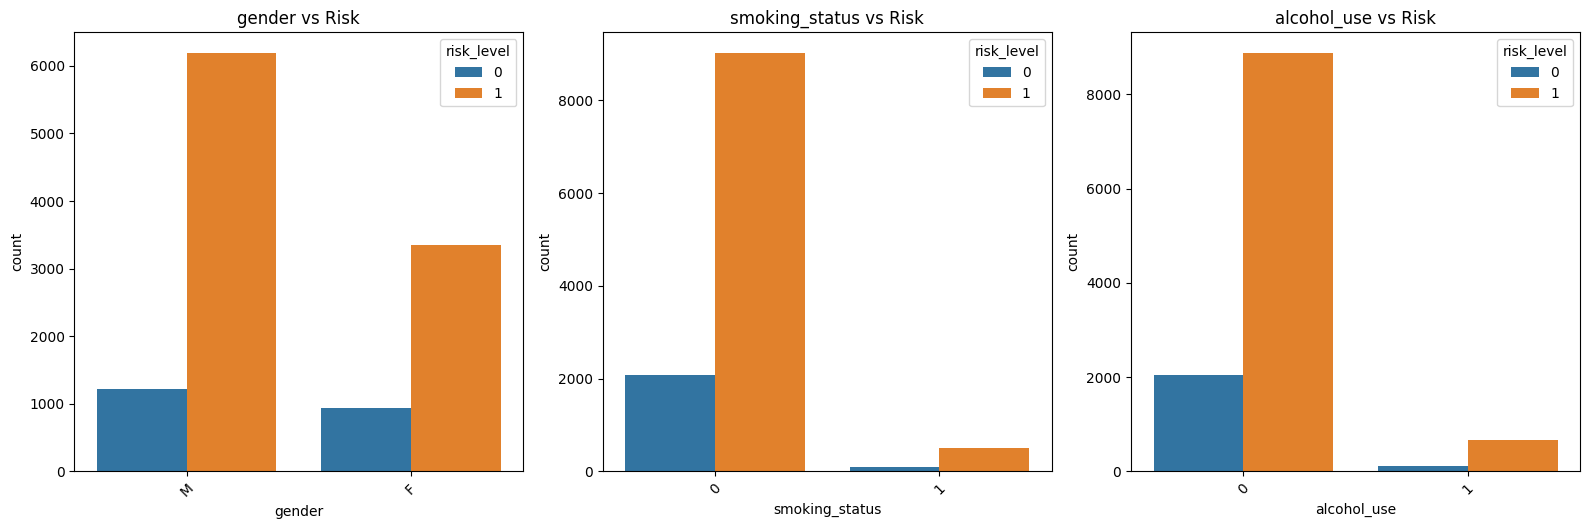

In [392]:
#Bivariate analysis for categorical_cols:

plt.figure(figsize=(16, 30))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)  
    sns.countplot(data=train_data, x=col, hue=target)
    plt.title(f"{col} vs Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Bivariate analysis for numarical cols with target


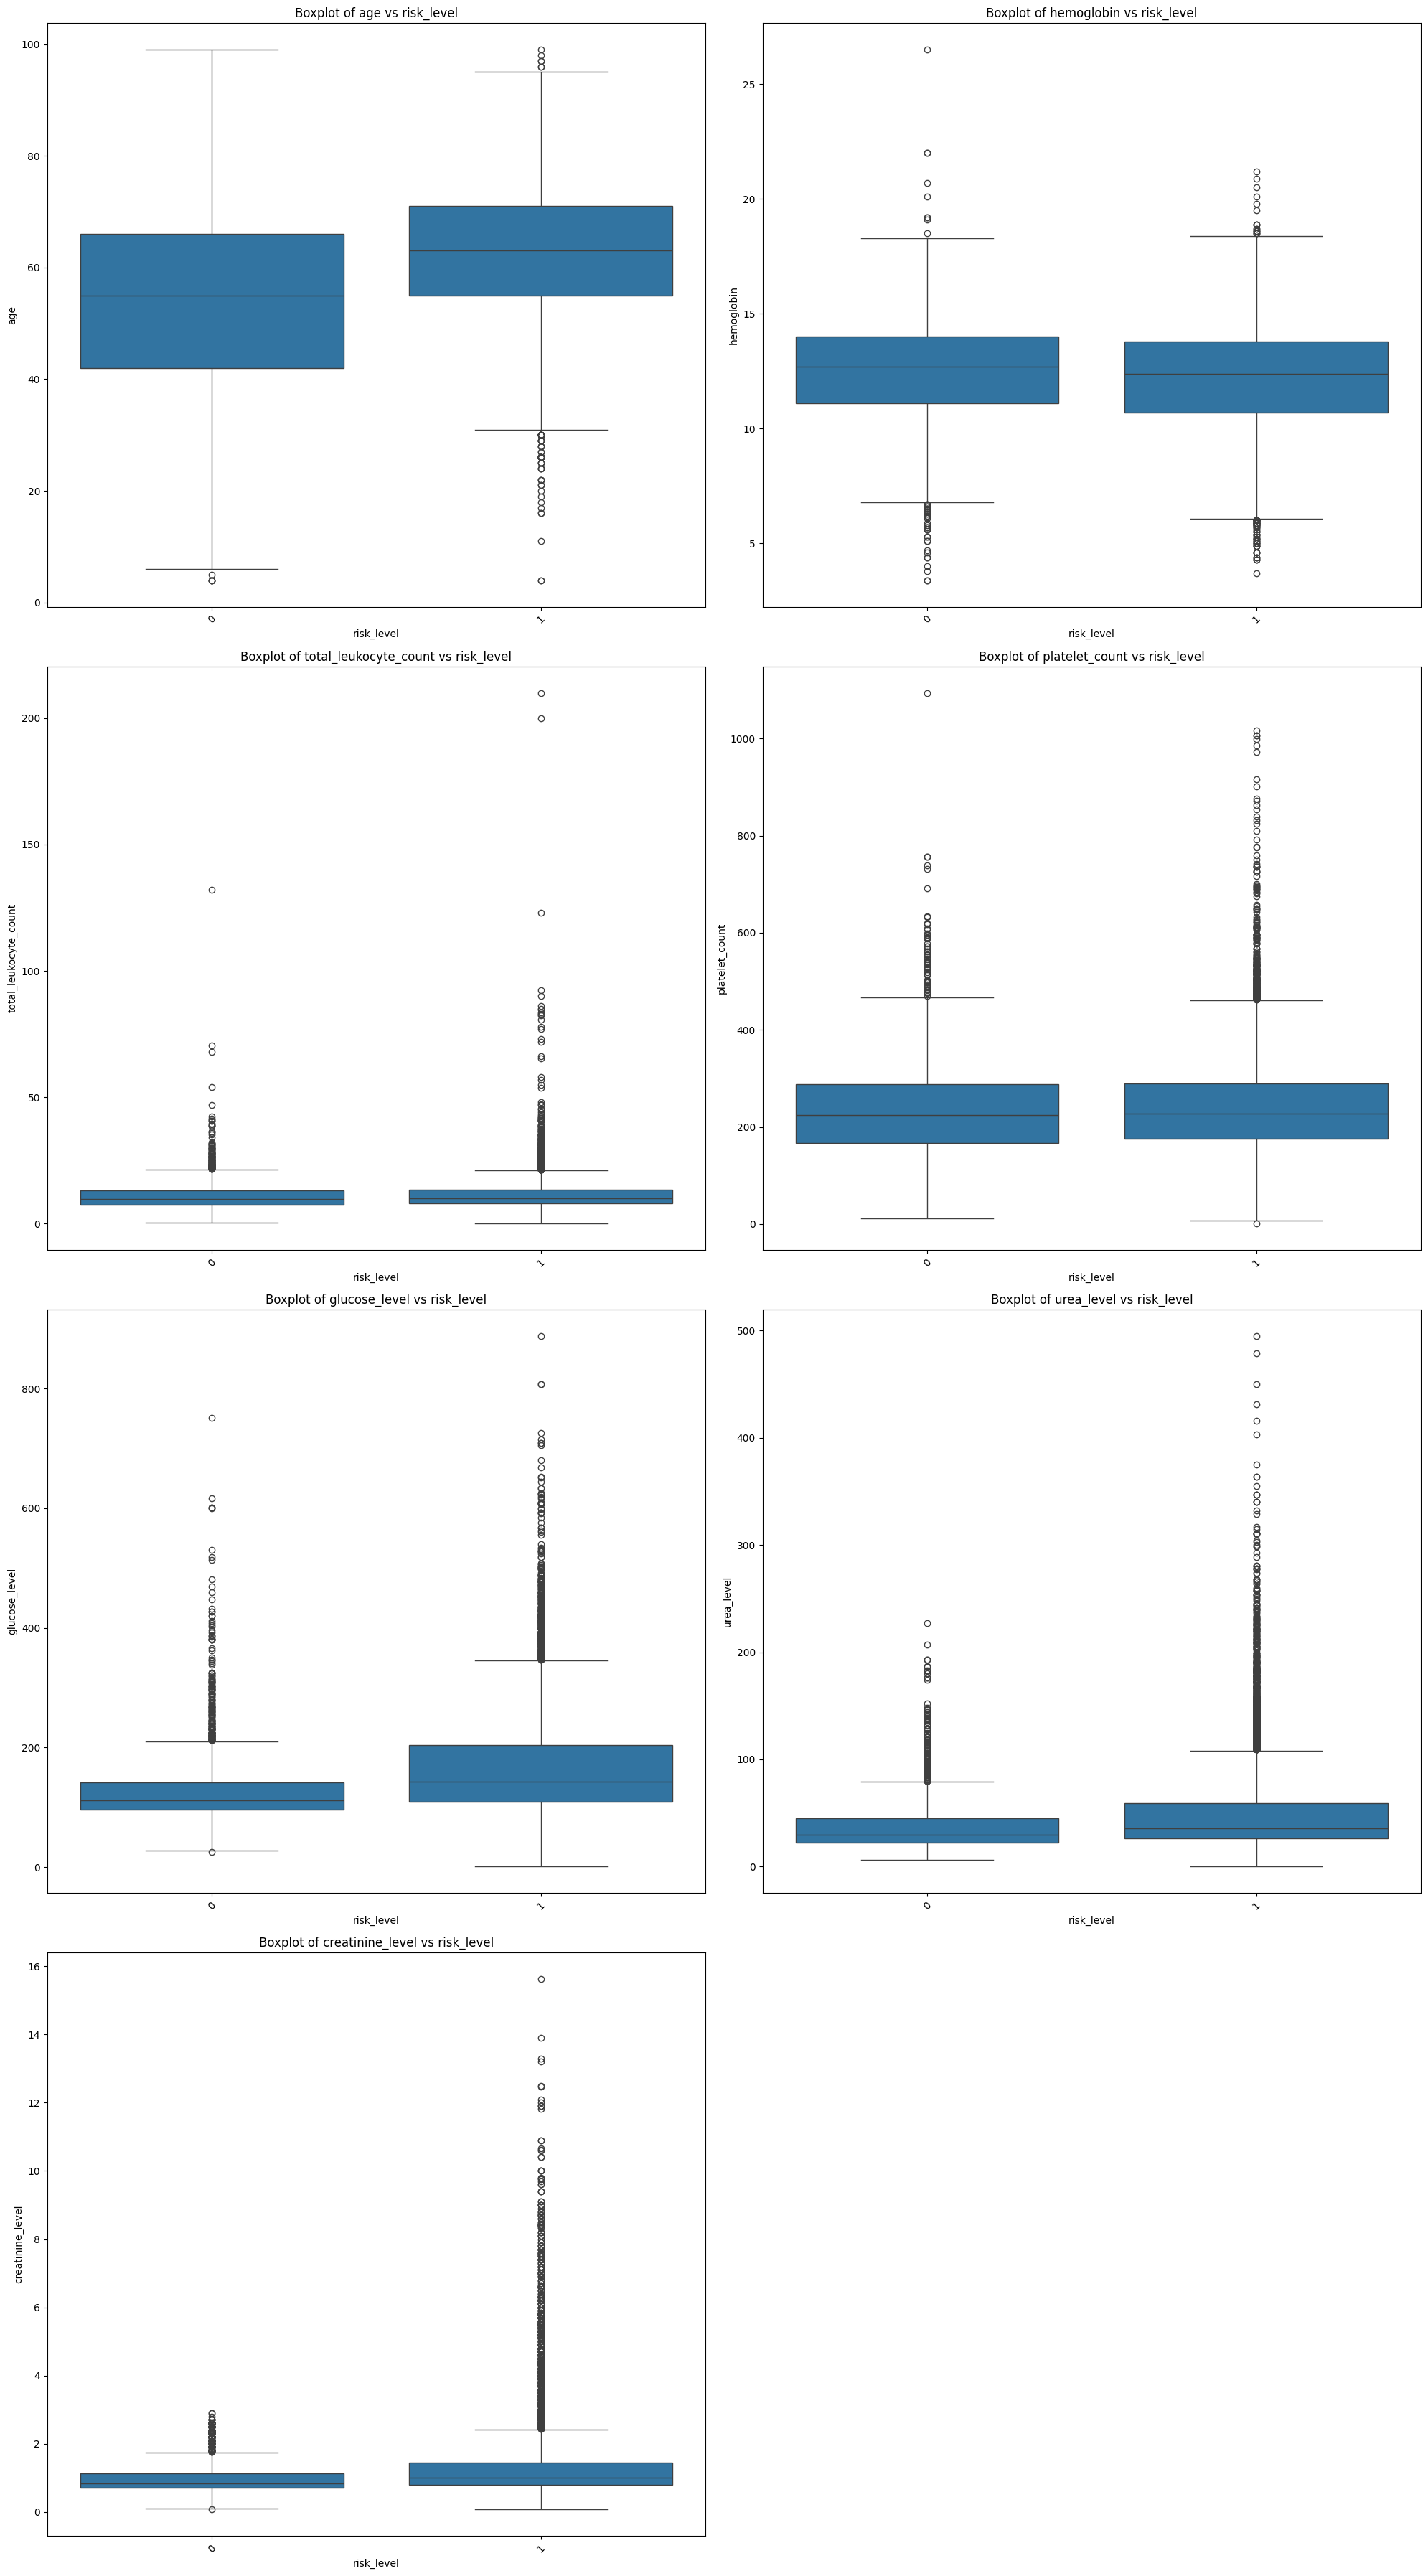

In [393]:
# Bivariate analysis for numarical cols with target

n = len(numerical_cols)
cols = 2

# Auto-calc rows
rows = math.ceil(n / cols)

# Auto figure size (height grows with rows)
plt.figure(figsize=(20, rows * 9))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=train_data, x=target, y=col)
    plt.title(f'Boxplot of {col} vs {target}', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Statistical Association Analysis (ANOVA and Chi-Square Tests)

Chi-Square

In [394]:
for col in categorical_cols:
    table = pd.crosstab(train_data[col], train_data[target])
    
    chi2, p_value, dof, expected = chi2_contingency(table)
    
    if p_value < 0.05:
        print(col, ":", round(p_value, 4), ": Strong")
    else:
        print(col, ":", round(p_value, 4), ": Weak")

gender : 0.0 : Strong
smoking_status : 0.0595 : Weak
alcohol_use : 0.0494 : Strong


ANOVA

In [395]:



for col in numerical_cols:
    groups = []

    # Split numerical column into groups based on target (Yes/No)
    for level in train_data[target].unique():
        groups.append(train_data[train_data[target] == level][col])

    # ANOVA F-test
    f_stat, p_value = f_oneway(*groups)

    # Print results
    print(f"Feature: {col}")
    print(f"  F-statistic = {f_stat:.4f}")
    print(f"  p-value     = {p_value:.6f}")

    # Strength logic
    if p_value < 0.05:
        print("  Result: STRONG \n")
    else:
        print("  Result: WEAK \n")

Feature: age
  F-statistic = 884.4450
  p-value     = 0.000000
  Result: STRONG 

Feature: hemoglobin
  F-statistic = 20.1547
  p-value     = 0.000007
  Result: STRONG 

Feature: total_leukocyte_count
  F-statistic = 6.7693
  p-value     = 0.009285
  Result: STRONG 

Feature: platelet_count
  F-statistic = 3.9631
  p-value     = 0.046531
  Result: STRONG 

Feature: glucose_level
  F-statistic = 397.4088
  p-value     = 0.000000
  Result: STRONG 

Feature: urea_level
  F-statistic = 188.5555
  p-value     = 0.000000
  Result: STRONG 

Feature: creatinine_level
  F-statistic = 235.9923
  p-value     = 0.000000
  Result: STRONG 



Multicollinearity Analysis of Numerical Features


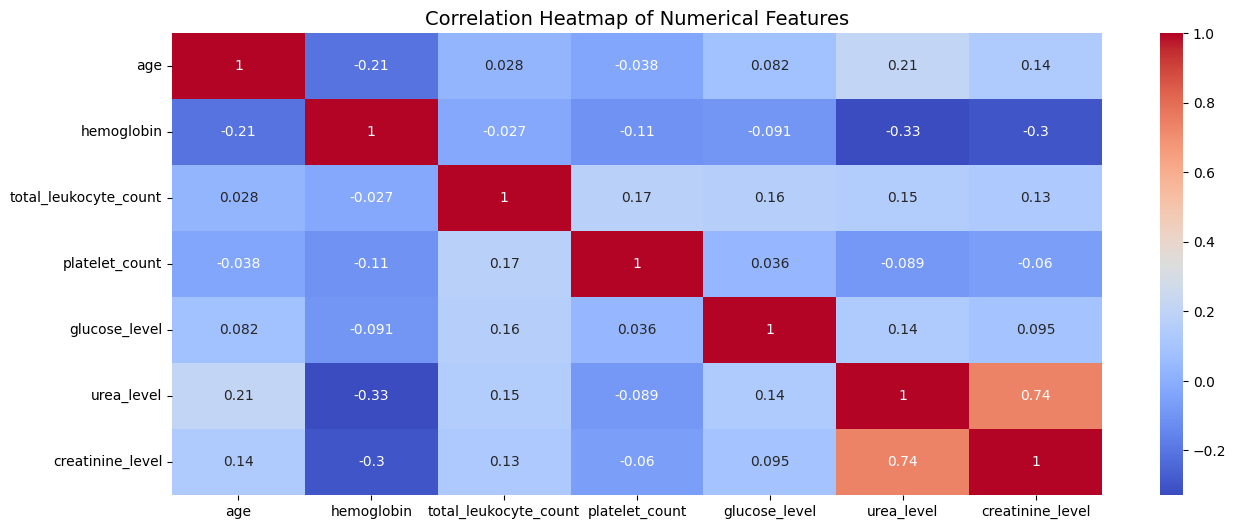

In [396]:
# Multicollinearity Analysis of Numerical Features

plt.figure(figsize=(15, 6))

sns.heatmap(
    train_data[numerical_cols].corr(),
    annot=True,
    cmap="coolwarm",
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


# Data Preprocessing

In [397]:
f_categorical_features = categorical_cols
f_numerical_features = numerical_cols

Feature encoding

In [398]:
train_data['gender'] = train_data['gender'].map({
    'M': 1,
    'F': 0
})

test_data['gender'] = test_data['gender'].map({
    'M': 1,
    'F': 0
})

Outlier treatment (capping)

In [399]:
# IQR-based outlier capping (fit on train, apply to train & test)

train_capped = train_data.copy()
test_capped = test_data.copy()

iqr_caps = {}

for col in f_numerical_features:
    Q1 = train_capped[col].quantile(0.25)
    Q3 = train_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    iqr_caps[col] = (lower, upper)

    # Apply capping
    train_capped[col] = train_capped[col].clip(lower, upper)
    test_capped[col] = test_capped[col].clip(lower, upper)

Train–test split mapping

In [400]:
x_train = train_capped.drop([target], axis=1)
y_train = train_capped[target]

x_test = test_capped.drop([target], axis=1)
y_test = test_capped[target]


SMOTE

In [401]:
# 1. Apply SMOTE ONLY on training data
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# 2. Scale numerical features ONLY
std = StandardScaler()

# Copy to avoid modifying originals
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

# Scale numerical columns
x_train_scaled[numerical_cols] = std.fit_transform(x_train[numerical_cols])
x_test_scaled[numerical_cols] = std.transform(x_test[numerical_cols])


# 3. Sanity checks (optional but recommended)

print("Training class distribution after SMOTE:")
print(y_train.value_counts())

print("\nTest class distribution (unchanged):")
print(y_test.value_counts())



Training class distribution after SMOTE:
risk_level
1    9531
0    9531
Name: count, dtype: int64

Test class distribution (unchanged):
risk_level
1    2383
0     542
Name: count, dtype: int64


# Model Training, Tuning, and Evaluation

Model Performance Summary and Comparison function

In [402]:
# Results table
results_df = pd.DataFrame(
    columns=["model", "recall_pos", "f1_macro", "roc_auc"]
)

def classification_summary(model, y_test, pred, pred_prob):
    global results_df
    
    recall_pos = recall_score(y_test, pred)
    f1_macro = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_prob[:, 1])

    print("\n--- model evaluation ---")
    print(f"model: {model.__class__.__name__}")
    print("recall (positive class):", round(recall_pos, 3))
    print("f1 score (macro):", round(f1_macro, 3))
    print("auc-roc:", round(roc_auc, 3))

    print("\nconfusion matrix:")
    print(confusion_matrix(y_test, pred))

    print("\nclassification report:")
    print(classification_report(y_test, pred))

    # Store results
    results_df.loc[len(results_df)] = [
        model.__class__.__name__,
        recall_pos,
        f1_macro,
        roc_auc
    ]

Logistic Regression

In [403]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")
model.fit(x_train_scaled, y_train)

pred = model.predict(x_test_scaled)
pred_prob = model.predict_proba(x_test_scaled)

classification_summary(model, y_test, pred, pred_prob)


--- model evaluation ---
model: LogisticRegression
recall (positive class): 0.688
f1 score (macro): 0.577
auc-roc: 0.685

confusion matrix:
[[ 306  236]
 [ 744 1639]]

classification report:
              precision    recall  f1-score   support

           0       0.29      0.56      0.38       542
           1       0.87      0.69      0.77      2383

    accuracy                           0.66      2925
   macro avg       0.58      0.63      0.58      2925
weighted avg       0.77      0.66      0.70      2925



Random Forest

In [404]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    class_weight={0:1, 1:2},
    random_state=42
)

model.fit(x_train, y_train)

pred = model.predict(x_test)
pred_prob = model.predict_proba(x_test)

# Evaluation
classification_summary(model, y_test, pred, pred_prob)


--- model evaluation ---
model: RandomForestClassifier
recall (positive class): 0.885
f1 score (macro): 0.709
auc-roc: 0.813

confusion matrix:
[[ 294  248]
 [ 275 2108]]

classification report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       542
           1       0.89      0.88      0.89      2383

    accuracy                           0.82      2925
   macro avg       0.71      0.71      0.71      2925
weighted avg       0.82      0.82      0.82      2925



Gradient Boosting Classifier

In [405]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    random_state=42
)

gb_model.fit(x_train, y_train)

pred = gb_model.predict(x_test)
pred_prob = gb_model.predict_proba(x_test)

classification_summary(
    model=gb_model,
    y_test=y_test,
    pred=pred,
    pred_prob=pred_prob
)


--- model evaluation ---
model: GradientBoostingClassifier
recall (positive class): 0.812
f1 score (macro): 0.629
auc-roc: 0.721

confusion matrix:
[[ 261  281]
 [ 449 1934]]

classification report:
              precision    recall  f1-score   support

           0       0.37      0.48      0.42       542
           1       0.87      0.81      0.84      2383

    accuracy                           0.75      2925
   macro avg       0.62      0.65      0.63      2925
weighted avg       0.78      0.75      0.76      2925



XGB Classifier

In [406]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(x_train, y_train)

pred = xgb_model.predict(x_test)
pred_prob = xgb_model.predict_proba(x_test)

classification_summary(
    model=xgb_model,
    y_test=y_test,
    pred=pred,
    pred_prob=pred_prob
)


--- model evaluation ---
model: XGBClassifier
recall (positive class): 0.852
f1 score (macro): 0.642
auc-roc: 0.726

confusion matrix:
[[ 239  303]
 [ 352 2031]]

classification report:
              precision    recall  f1-score   support

           0       0.40      0.44      0.42       542
           1       0.87      0.85      0.86      2383

    accuracy                           0.78      2925
   macro avg       0.64      0.65      0.64      2925
weighted avg       0.78      0.78      0.78      2925



In [407]:
results_df

,model,recall_pos,f1_macro,roc_auc
0,LogisticRegression,0.687789,0.577134,0.685330
1,RandomForestClassifier,0.884599,0.709446,0.812713
2,GradientBoostingClassifier,0.811582,0.629084,0.720678
3,XGBClassifier,0.852287,0.641515,0.725913


GridSearchCV

In [408]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(
    random_state=42,
    class_weight={0: 1, 1: 2},
    n_jobs=-1
)

param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [None, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
    "max_features": ["sqrt", "log2"]
}

grid_cv = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="f1_macro",   # matches your objective
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_cv.fit(x_train, y_train)

print("Best Parameters:", grid_cv.best_params_)
print("Best CV F1-macro:", grid_cv.best_score_)

best_model = grid_cv.best_estimator_
pred = best_model.predict(x_test)
pred_prob = best_model.predict_proba(x_test)



classification_summary(
    model=best_model,
    y_test=y_test,
    pred=pred,
    pred_prob=pred_prob
)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV F1-macro: 0.8715559040654728

--- model evaluation ---
model: RandomForestClassifier
recall (positive class): 0.886
f1 score (macro): 0.712
auc-roc: 0.815

confusion matrix:
[[ 295  247]
 [ 271 2112]]

classification report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       542
           1       0.90      0.89      0.89      2383

    accuracy                           0.82      2925
   macro avg       0.71      0.72      0.71      2925
weighted avg       0.83      0.82      0.82      2925



RandomizedSearchCV

In [409]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# 1. Define model
rf = RandomForestClassifier(
    random_state=42,
    class_weight={0: 1, 1: 2},
    n_jobs=-1
)


# 2. Parameter distributions
param_dist = {
    "n_estimators": randint(200, 600),
    "max_depth": [None, 8, 12, 16],
    "min_samples_split": randint(2, 15),
    "min_samples_leaf": randint(1, 8),
    "max_features": ["sqrt", "log2"]
}


# 3. RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

random_cv.fit(x_train, y_train)


# 4. Best model
best_model = random_cv.best_estimator_

print("Best Parameters:", random_cv.best_params_)
print("Best CV F1-macro:", random_cv.best_score_)


# 5. Test evaluation
pred = best_model.predict(x_test)
pred_prob = best_model.predict_proba(x_test)

classification_summary(
    model=best_model,
    y_test=y_test,
    pred=pred,
    pred_prob=pred_prob
)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 328}
Best CV F1-macro: 0.8544840580332729

--- model evaluation ---
model: RandomForestClassifier
recall (positive class): 0.917
f1 score (macro): 0.697
auc-roc: 0.799

confusion matrix:
[[ 244  298]
 [ 198 2185]]

classification report:
              precision    recall  f1-score   support

           0       0.55      0.45      0.50       542
           1       0.88      0.92      0.90      2383

    accuracy                           0.83      2925
   macro avg       0.72      0.68      0.70      2925
weighted avg       0.82      0.83      0.82      2925



In [410]:
# Final RF model with BEST parameters (RCV)

final_rf = RandomForestClassifier(
    n_estimators=328,
    max_depth=None,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=9,
    class_weight={0: 1, 1: 2},
    random_state=42,
    n_jobs=-1
)

# Train on full training data
final_rf.fit(x_train, y_train)


# 2. Predict on test data
pred = final_rf.predict(x_test)


# 3. Compute False Negative Percentage
cm = confusion_matrix(y_test, pred)
TN, FP, FN, TP = cm.ravel()

fn_percentage = (FN / (FN + TP)) * 100

print("Confusion Matrix:")
print(cm)

print(f"\nFalse Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")
print(f"False Negative Percentage: {fn_percentage:.2f}%")

Confusion Matrix:
[[ 244  298]
 [ 198 2185]]

False Negatives (FN): 198
True Positives (TP): 2185
False Negative Percentage: 8.31%


In [ ]:
import pickle

# File path
model_path = r"HealthAI\models\risk_stratification_model.pkl"

# Save model
with open(model_path, "wb") as file:
    pickle.dump(final_rf, file)

print("Model saved successfully as:", model_path)